<a href="https://colab.research.google.com/github/the-nameshifter/Cardiovascular-Disease/blob/main/CardioVascularDisease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')



---




Aim of the problem is to detect the presence or absence of cardiovascular disease in person based on the given features.
Features available are:


- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Note that:
- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.

Data Source:https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

In [ ]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Cardio_DF = pd.read_csv("/content/cardio_train.csv", sep=";")

In [ ]:
Cardio_DF

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
1,55.419178,1,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
2,51.663014,1,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0
3,48.282192,2,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0
4,47.873973,1,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48798,56.632877,2,173.0,90.0,130.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0
48799,57.410959,1,156.0,75.0,140.0,90.0,1.0,1.0,0.0,0.0,1.0,1.0
48800,56.687671,1,169.0,72.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
48801,56.432877,1,152.0,90.0,120.0,80.0,2.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
Cardio_DF.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
48798,69675,20671,2,173.0,90.0,130.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0
48799,69678,20955,1,156.0,75.0,140.0,90.0,1.0,1.0,0.0,0.0,1.0,1.0
48800,69679,20691,1,169.0,72.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
48801,69681,20598,1,152.0,90.0,120.0,80.0,2.0,1.0,0.0,0.0,0.0,1.0
48802,69683,19580,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Analysis

: Drop id

In [ ]:
Cardio_DF = Cardio_DF.drop(columns = "id")

In [ ]:
Cardio_DF

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
1,20228,1,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
2,18857,1,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0
3,17623,2,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0
4,17474,1,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48798,20671,2,173.0,90.0,130.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0
48799,20955,1,156.0,75.0,140.0,90.0,1.0,1.0,0.0,0.0,1.0,1.0
48800,20691,1,169.0,72.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
48801,20598,1,152.0,90.0,120.0,80.0,2.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
Cardio_DF = Cardio_DF.drop(48802)


In [ ]:
Cardio_DF

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
1,55.419178,1,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
2,51.663014,1,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0
3,48.282192,2,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0
4,47.873973,1,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48797,45.531507,1,153.0,99.0,140.0,1100.0,3.0,3.0,0.0,0.0,0.0,1.0
48798,56.632877,2,173.0,90.0,130.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0
48799,57.410959,1,156.0,75.0,140.0,90.0,1.0,1.0,0.0,0.0,1.0,1.0
48800,56.687671,1,169.0,72.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0


#### Let's covert the age given in days into years

In [ ]:
Cardio_DF['age'] = Cardio_DF['age']/365

In [ ]:
Cardio_DF.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
1,55.419178,1,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
2,51.663014,1,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0
3,48.282192,2,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0
4,47.873973,1,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Checking the null values
Cardio_DF.isnull().sum()

age            0
gender         0
height         1
weight         1
ap_hi          1
ap_lo          1
cholesterol    1
gluc           1
smoke          1
alco           1
active         1
cardio         1
dtype: int64

In [ ]:
# Checking the dataframe information

Cardio_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48803 entries, 0 to 48802
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          48803 non-null  float64
 1   gender       48803 non-null  int64  
 2   height       48802 non-null  float64
 3   weight       48802 non-null  float64
 4   ap_hi        48802 non-null  float64
 5   ap_lo        48802 non-null  float64
 6   cholesterol  48802 non-null  float64
 7   gluc         48802 non-null  float64
 8   smoke        48802 non-null  float64
 9   alco         48802 non-null  float64
 10  active       48802 non-null  float64
 11  cardio       48802 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 4.5 MB


In [ ]:
# Statistical summary of the dataframe
Cardio_DF.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,48803.000000,48803.000000,48802.000000,48802.000000,48802.000000,48802.000000,48802.000000,48802.000000,48802.000000,48802.000000,48802.000000,48802.000000
mean,53.326563,1.347007,164.366973,74.229075,128.812364,96.958834,1.363735,1.225851,0.088378,0.053543,0.802303,0.499221
std,6.767103,0.476023,8.197230,14.331377,156.312902,201.657044,0.677415,0.572067,0.283846,0.225116,0.398266,0.500005
min,29.583562,1.000000,55.000000,11.000000,-150.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.380822,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.983562,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.410959,2.000000,170.000000,82.000000,140.000000,90.000000,1.750000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.904110,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Cardio_DF[Cardio_DF['ap_hi'] >= 16020.000000]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
40852,47.775342,1,169.0,70.0,16020.0,80.0,1.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
Cardio_DF = Cardio_DF.drop(40852)

In [ ]:
Cardio_DF[Cardio_DF['ap_lo'] >= 11000.000000]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
43326,63.619178,1,160.0,105.0,200.0,11000.0,1.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
Cardio_DF.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,48799.000000,48799.000000,48799.000000,48799.000000,48799.00000,48799.000000,48799.000000,48799.000000,48799.000000,48799.000000,48799.000000,48799.000000
mean,53.326325,1.347015,164.367139,74.228495,128.45921,96.735896,1.363757,1.225865,0.088383,0.053546,0.802312,0.499191
std,6.767108,0.476026,8.197344,14.331126,138.66102,195.529837,0.677430,0.572082,0.283854,0.225122,0.398260,0.500004
min,29.583562,1.000000,55.000000,11.000000,-150.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.380822,1.000000,159.000000,65.000000,120.00000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.983562,1.000000,165.000000,72.000000,120.00000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.410959,2.000000,170.000000,82.000000,140.00000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.904110,2.000000,250.000000,200.000000,14020.00000,10000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Cardio_DF[Cardio_DF['ap_lo'] >= 10000.000000]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2381,57.517808,2,186.0,105.0,140.0,10000.0,1.0,1.0,0.0,0.0,1.0,1.0
23849,49.594521,2,169.0,86.0,150.0,10000.0,2.0,2.0,0.0,1.0,1.0,1.0


In [ ]:
Cardio_DF = Cardio_DF.drop(23849)

In [ ]:
Cardio_DF = Cardio_DF.drop(2381)

In [ ]:
Cardio_DF.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,48797.000000,48797.000000,48797.0000,48797.000000,48797.000000,48797.000000,48797.000000,48797.000000,48797.000000,48797.000000,48797.000000,48797.000000
mean,53.326315,1.346989,164.3666,74.227623,128.458532,96.330000,1.363752,1.225854,0.088387,0.053528,0.802303,0.499170
std,6.767199,0.476017,8.1969,14.330643,138.663818,184.969018,0.677435,0.572082,0.283859,0.225086,0.398266,0.500004
min,29.583562,1.000000,55.0000,11.000000,-150.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.380822,1.000000,159.0000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.983562,1.000000,165.0000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.410959,2.000000,170.0000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.904110,2.000000,250.0000,200.000000,14020.000000,9800.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Cardio_DF[Cardio_DF['ap_lo'] >= 9800.000000	]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
43434,60.016438,2,179.0,62.0,130.0,9800.0,1.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
Cardio_DF = Cardio_DF.drop(43434)



In [ ]:
Cardio_DF.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,48796.000000,48796.000000,48796.000000,48796.000000,48796.000000,48796.000000,48796.000000,48796.000000,48796.000000,48796.000000,48796.000000,48796.000000
mean,53.326178,1.346975,164.366301,74.227873,128.458501,96.131138,1.363759,1.225859,0.088388,0.053529,0.802299,0.499180
std,6.767200,0.476013,8.196716,14.330683,138.665238,179.678793,0.677440,0.572087,0.283862,0.225088,0.398269,0.500004
min,29.583562,1.000000,55.000000,11.000000,-150.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.380137,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.983562,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.410959,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.904110,2.000000,250.000000,200.000000,14020.000000,9100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Cardio_DF[Cardio_DF['age']> 64.8]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
395,64.824658,2,160.0,78.0,140.0,90.0,1.0,1.0,0.0,0.0,1.0,0.0
643,64.802740,1,154.0,79.0,130.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
2936,64.808219,2,156.0,60.0,140.0,90.0,1.0,1.0,0.0,0.0,1.0,1.0
4295,64.849315,1,169.0,75.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
9787,64.838356,2,165.0,70.0,120.0,80.0,1.0,1.0,0.0,0.0,0.0,0.0
10422,64.816438,2,177.0,102.0,130.0,80.0,1.0,2.0,0.0,0.0,1.0,0.0
16439,64.821918,1,160.0,65.0,130.0,80.0,3.0,3.0,0.0,0.0,0.0,1.0
18062,64.863014,1,140.0,48.0,170.0,100.0,2.0,1.0,0.0,0.0,1.0,1.0
20931,64.904110,1,165.0,63.0,150.0,90.0,2.0,1.0,0.0,0.0,1.0,1.0
22229,64.838356,2,170.0,91.0,130.0,90.0,1.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Obtain the features of the individuals who are older than 64.8 years old

Cardio_DF[Cardio_DF['age']>64.8]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
395,64.824658,2,160.0,78.0,140.0,90.0,1.0,1.0,0.0,0.0,1.0,0.0
643,64.802740,1,154.0,79.0,130.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
2936,64.808219,2,156.0,60.0,140.0,90.0,1.0,1.0,0.0,0.0,1.0,1.0
4295,64.849315,1,169.0,75.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
9787,64.838356,2,165.0,70.0,120.0,80.0,1.0,1.0,0.0,0.0,0.0,0.0
10422,64.816438,2,177.0,102.0,130.0,80.0,1.0,2.0,0.0,0.0,1.0,0.0
16439,64.821918,1,160.0,65.0,130.0,80.0,3.0,3.0,0.0,0.0,0.0,1.0
18062,64.863014,1,140.0,48.0,170.0,100.0,2.0,1.0,0.0,0.0,1.0,1.0
20931,64.904110,1,165.0,63.0,150.0,90.0,2.0,1.0,0.0,0.0,1.0,1.0
22229,64.838356,2,170.0,91.0,130.0,90.0,1.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
Cardio_DF[Cardio_DF['ap_hi']>170.0]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
59,55.975342,1,164.0,64.0,180.0,90.0,1.0,1.0,1.0,0.0,1.0,1.0
61,57.424658,2,165.0,75.0,180.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
101,51.282192,1,167.0,80.0,190.0,90.0,2.0,1.0,0.0,1.0,0.0,0.0
230,64.043836,2,175.0,75.0,180.0,100.0,3.0,1.0,1.0,1.0,1.0,1.0
355,63.271233,1,158.0,73.0,180.0,100.0,3.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48568,59.950685,1,157.0,80.0,200.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
48572,59.923288,2,180.0,115.0,180.0,105.0,1.0,1.0,0.0,0.0,0.0,1.0
48596,50.273973,2,180.0,104.0,180.0,100.0,3.0,2.0,0.0,0.0,1.0,1.0
48640,51.969863,1,164.0,86.0,215.0,110.0,3.0,3.0,0.0,0.0,1.0,1.0


In [ ]:
Cardio_DF = Cardio_DF.drop(48795)

# Dataset Visualization 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52f249c650>,
      dtype=object)

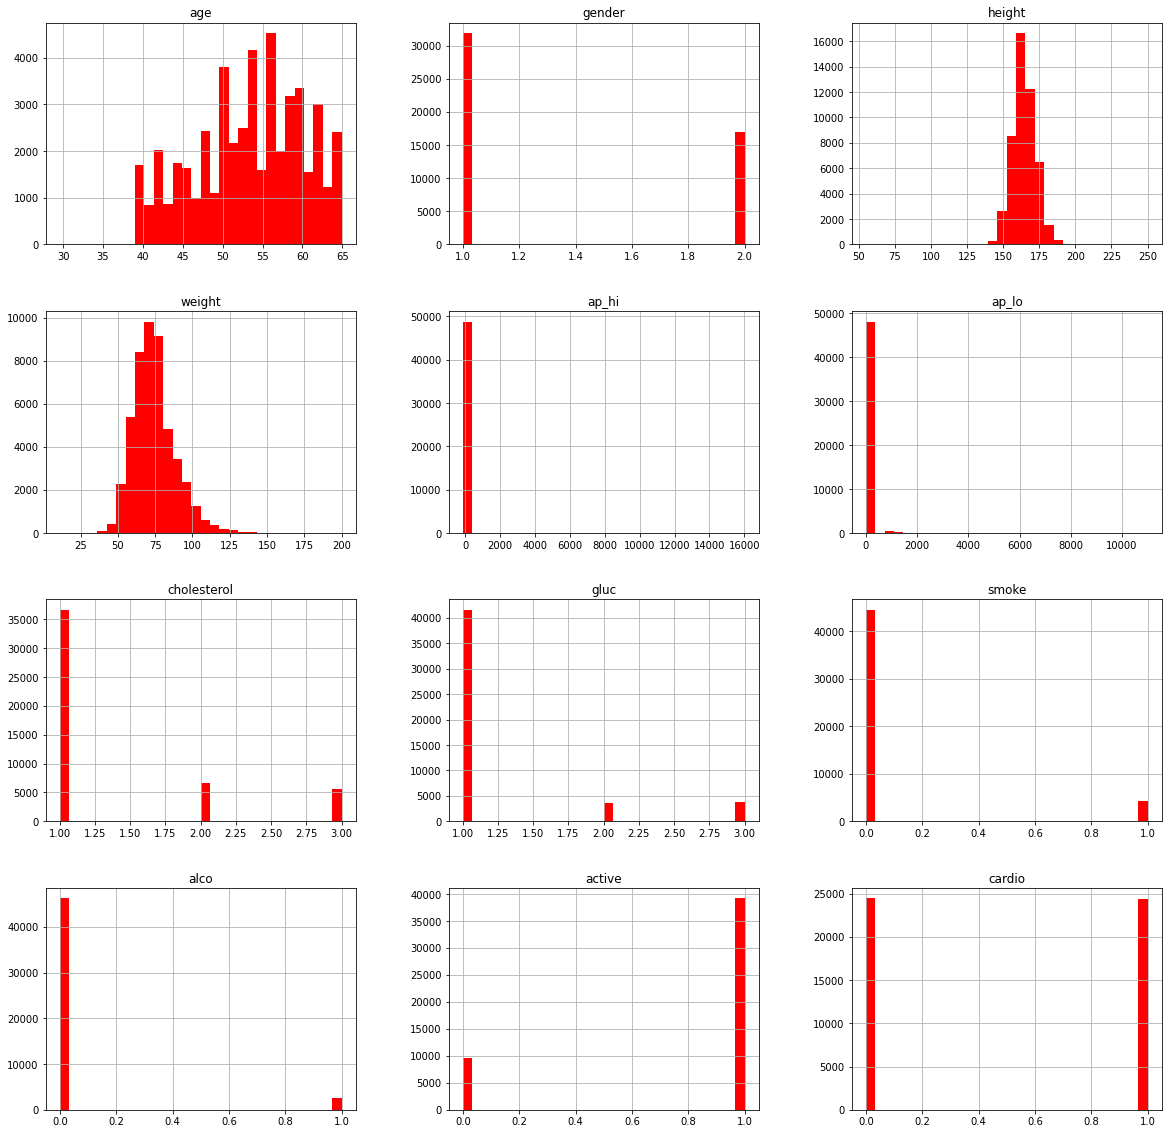

In [ ]:
Cardio_DF.hist(bins = 30, figsize= (20, 20), color = 'r')

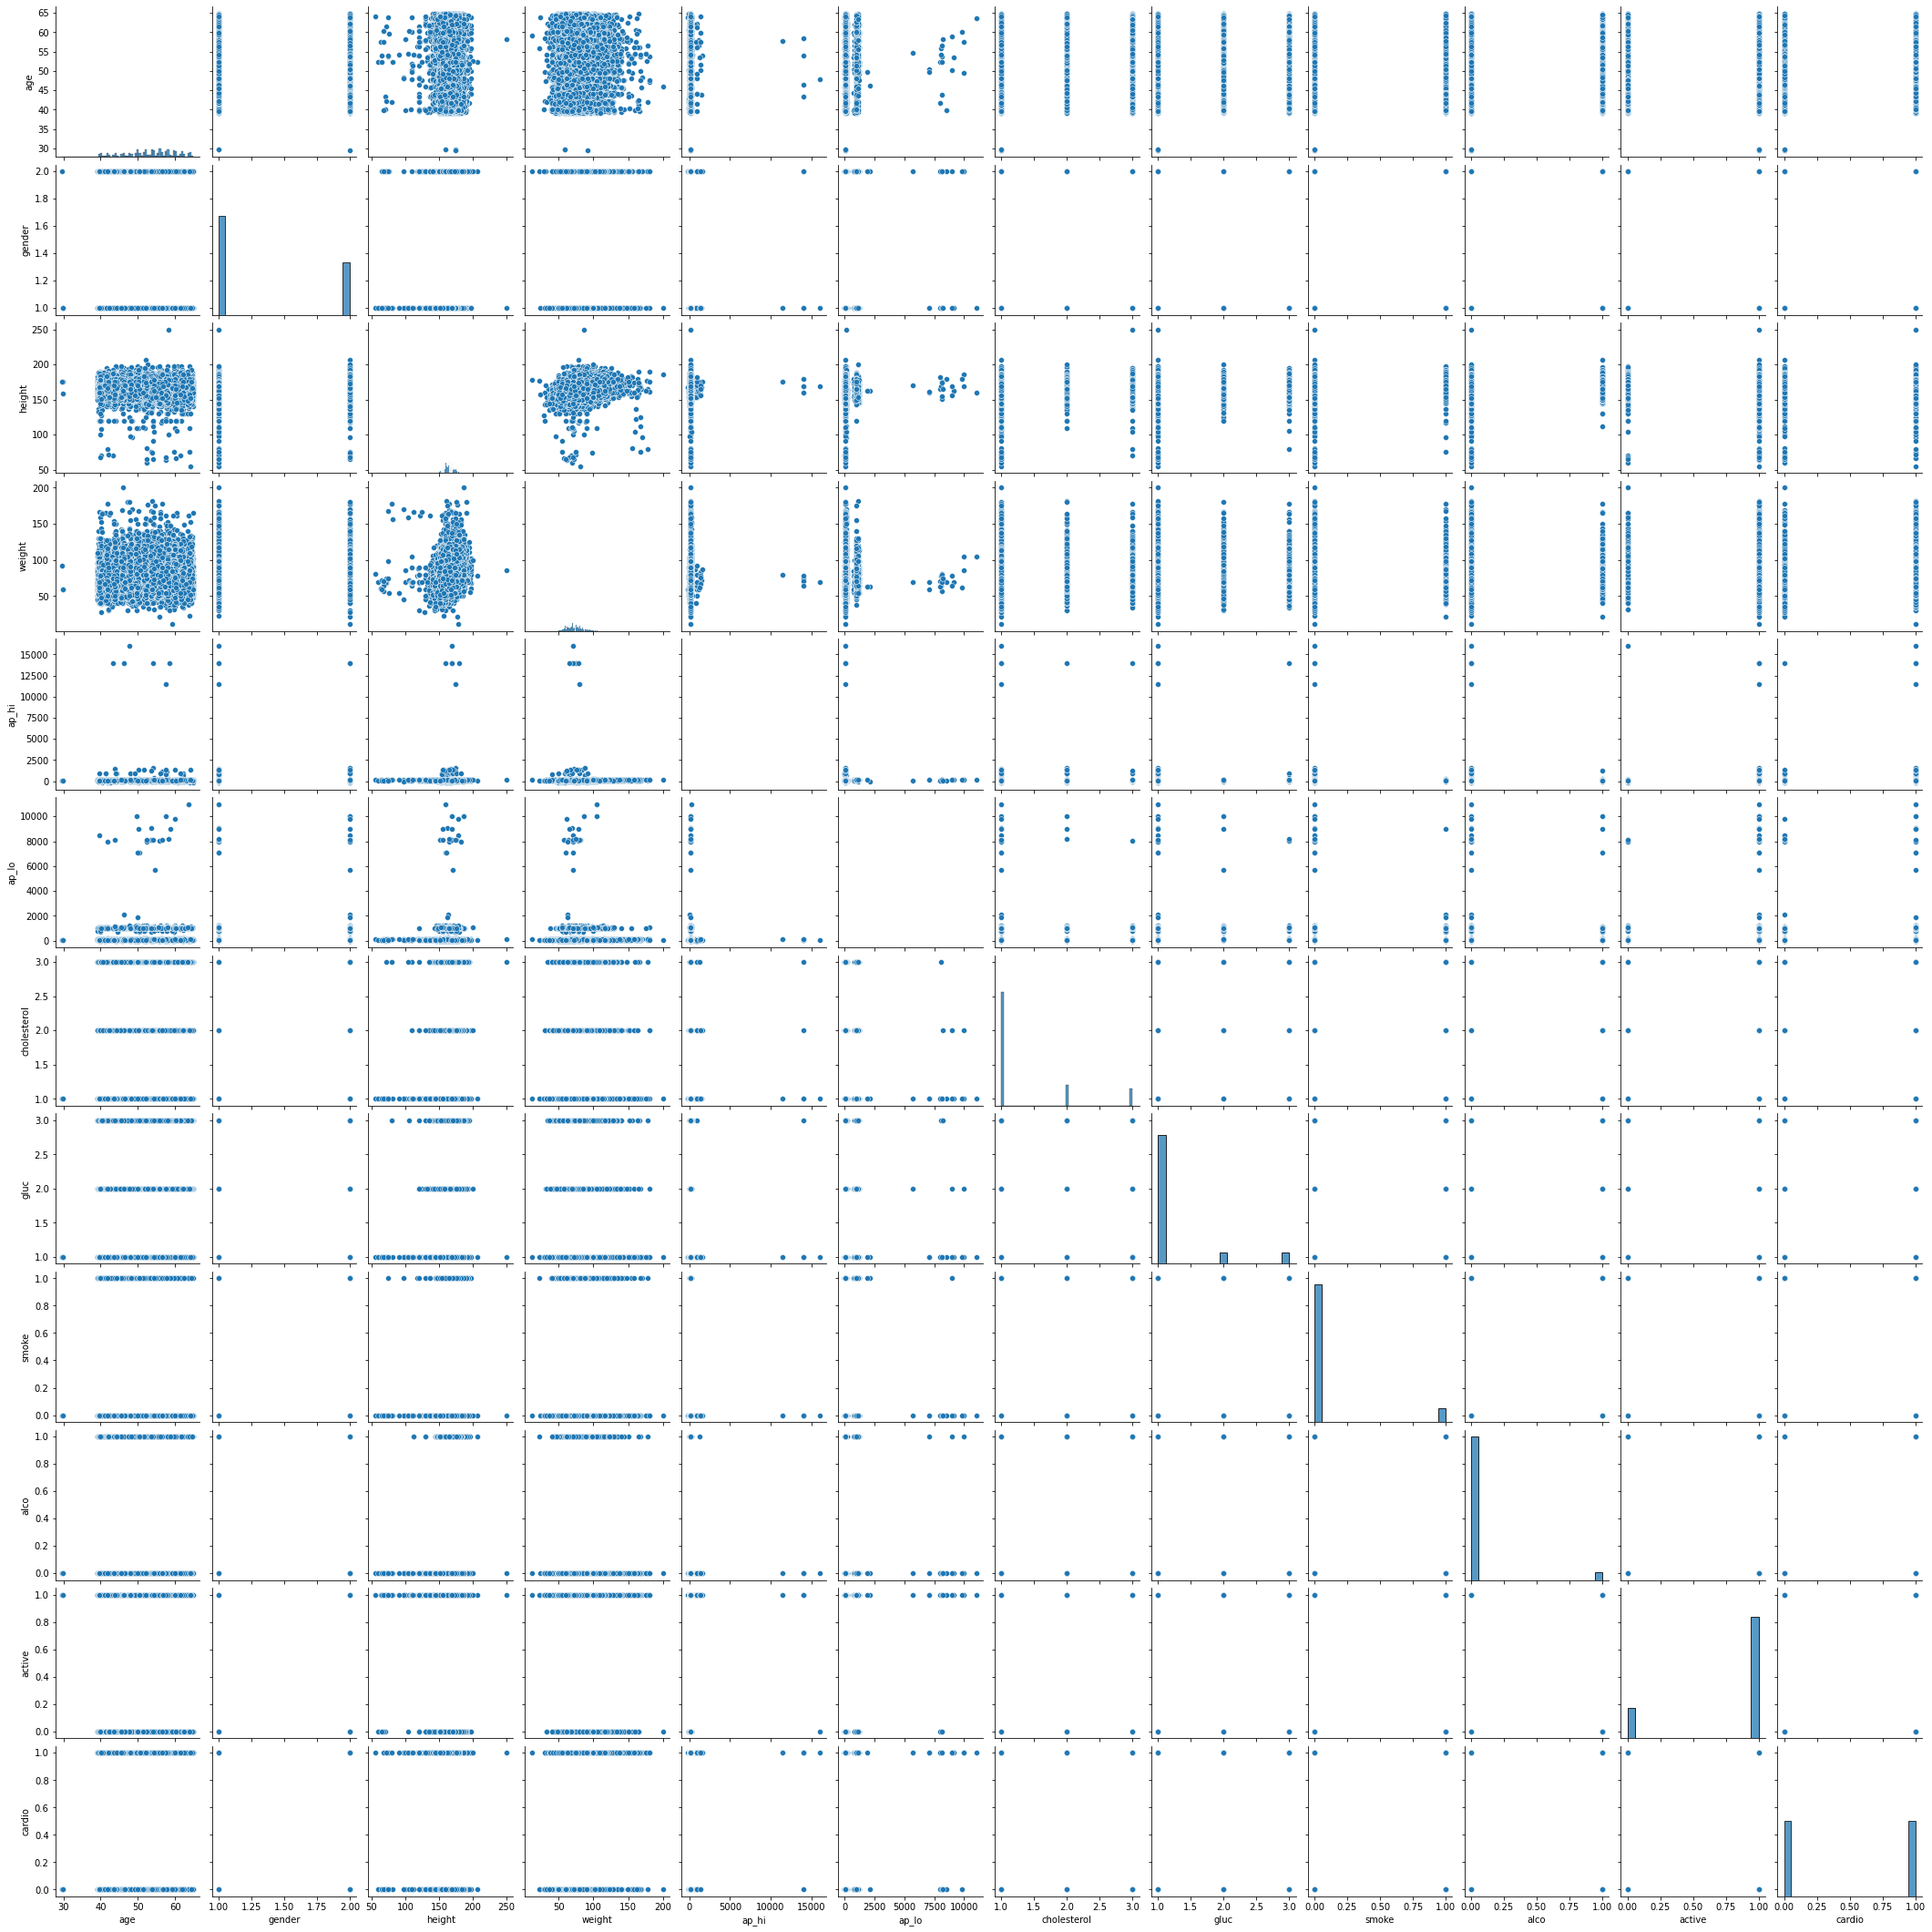

In [ ]:
sns.pairplot(Cardio_DF)

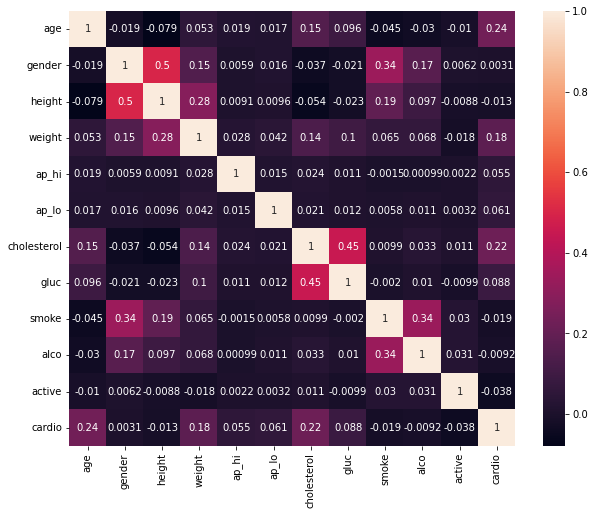

In [ ]:
Correlations = Cardio_DF.corr()

f, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(Correlations, annot = True)

# Create Training and Testing Dataset

In [ ]:
X = Cardio_DF.drop(['cardio'], axis = 1)
y = Cardio_DF['cardio']

In [ ]:
Cardio_DF.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
X.shape

(48802, 11)

In [ ]:
y.shape

(48802,)

In [ ]:
# Spliting the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape

(39041, 11)

In [ ]:
y_train.shape

(39041,)

In [ ]:
X_test.shape

(9761, 11)

In [ ]:
y_test.shape

(9761,)

# Train and test XGBoost Model

In [ ]:
# model = XGBoost Classifier (Learning rate 0.01, n_estimators = 100, objective = 'binary:logistic') = defautl values
import xgboost as xgb
model = xgb.XGBClassifier(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 6, n_estimators= 100)
model.fit(X_train, y_train)

XGBClassifier(max_depth=6, objective='multi:softprob')

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1., 1., 0., ..., 0., 0., 1.])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

0.734658334187071
[[3843 1430]
 [1160 3328]]


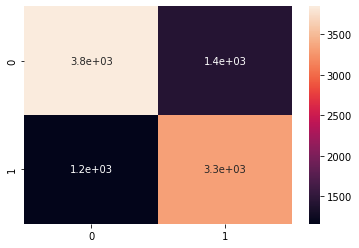

In [ ]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_pred, y_test))
print(cm)

# Optimization with grid search

In [ ]:
param_grid = {
    'gamma': [0.5, 1, 5], #Regularization parameter
    'subsample': [0.6, 0.8, 1.0], # % of rows token to builld each tree
    'colsample_bytree': [0.6, 0.8, 1.0], # number of columns used by each tree
    'max_depth' : [3, 4, 5] # depth of each tree
}
from xgboost import XGBClassifier

xgb_model = XGBClassifier(learning_rate=0.01, n_estimators=100, objective='binary:logistic')
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(xgb_model, param_grid, refit = True, verbose = 4)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.727 total time=   2.2s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.727 total time=   2.2s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.730 total time=   2.2s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.730 total time=   2.2s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.734 total time=   2.2s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.728 total time=   2.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.726 total time=   2.1s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.730 total time=   2.1s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.730 tot

GridSearchCV(estimator=XGBClassifier(learning_rate=0.01),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 5], 'max_depth': [3, 4, 5],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=4)

In [ ]:
y_predict_optim = grid.predict(X_test)
y_predict_optim

array([1, 1, 1, ..., 0, 0, 1])

0.733
[[5444 2267]
 [1471 4818]]


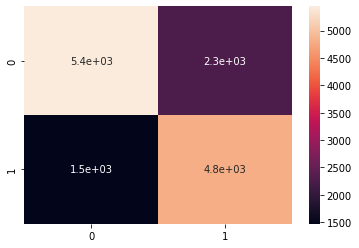

In [ ]:
cm = confusion_matrix(y_predict_optim, y_test)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_predict_optim, y_test))
print(cm)

In [ ]:
print(classification_report(y_test, y_predict_optim))

SyntaxError: ignored

# Appling PCA 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)

X_test = pca.fit_transform(X_test)

# XGBoost one more time

In [ ]:
model = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.1, max_depth = 6, n_estimators= 100)
model.fit(X_train, y_train)

XGBClassifier(max_depth=6)

In [ ]:
y_pred_final = model.predict(X_test)
y_pred_final

array([1., 0., 1., ..., 1., 0., 0.])

0.7156029095379571
[[3944 1816]
 [ 960 3041]]


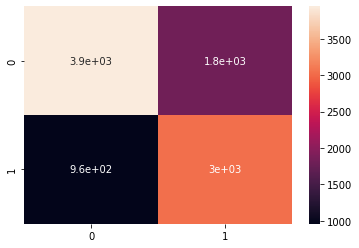

In [ ]:
cm = confusion_matrix(y_pred_final, y_test)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_pred_final, y_test))
print(cm)